In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
from keras.utils import to_categorical
from PIL import Image

def load_train_data(root_dir, csv_file):
    ids = []
    images = []
    labels = []
    annotations = np.genfromtxt(csv_file, delimiter=',', names=True)
    for idx in range(len(annotations)):
        img_id = int(annotations['id'][idx])
        img_name = os.path.join(root_dir, f"image_{img_id}.png")
        image = np.array(Image.open(img_name).convert("RGB"))
        # image = process_imgs(image)
        label = int(annotations['label'][idx])

        ids.append(img_id)
        images.append(image)
        labels.append(label)
    return np.array(ids), np.array(images), np.array(labels)

def load_test_data(root_dir):
    ids = []
    images = []
    for idx in range(len(os.listdir(root_dir))):
        img_name = os.path.join(root_dir, f"image_{idx}.png")
        image = np.array(Image.open(img_name).convert("RGB"))

        ids.append(idx)
        images.append(image)
    return np.array(ids), np.array(images)

# Load training, testing data, and the training label provided in train.csv.
train_csv = 'train.csv'
train_dir = 'train'
test_dir = 'test'
id_train, X_train, y_train = load_train_data(train_dir, train_csv)
id_test, X_test = load_test_data(test_dir)

# Normalize the data.
X_train = X_train/ 255
X_test = X_test/ 255

# Convert training labels to one-hot encoded vectors.// it slow down my Restnet process so I turned it down
# y_train = to_categorical(y_train, 10)

In [11]:
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [13]:
num_of_classes = 10



model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/opt/anaconda3/envs/tf_macos/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-08-04 10:38:38.195033: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-08-04 10:38:38.195054: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-08-04 10:38:38.195059: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-08-04 10:38:38.195075: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-04 10:38:38.195086: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localh

In [14]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [15]:

model.fit(X_new_train, y_new_train, validation_split=0.1, epochs=10)

Epoch 1/10


2024-08-04 10:38:38.677558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.2268 - loss: 2.1114 - val_acc: 0.3077 - val_loss: 1.9031
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3231 - loss: 1.8755 - val_acc: 0.3525 - val_loss: 1.8302
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3526 - loss: 1.8223 - val_acc: 0.3487 - val_loss: 1.8140
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3646 - loss: 1.7846 - val_acc: 0.3618 - val_loss: 1.7984
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3757 - loss: 1.7616 - val_acc: 0.3745 - val_loss: 1.7581
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3790 - loss: 1.7565 - val_acc: 0.3820 - val_loss: 1.7577
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3837 - loss: 1.7361 - val_acc: 0.3702 - val_loss: 1.7680
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.3877 - loss: 1.7320 - val_acc: 0.3800 - val_loss: 1.7839
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/st

In [16]:
num_of_classes = 10
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [17]:
# Define the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 3)))  
model.add(layers.UpSampling2D((2,2))) 
model.add(layers.UpSampling2D((2,2)))  
model.add(layers.UpSampling2D((2,2)))  
model.add(convolutional_base)           
model.add(layers.Flatten())             
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))


/opt/anaconda3/envs/tf_macos/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
optimizer = optimizers.RMSprop(learning_rate=2e-5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 131072)         │       524,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,899,018 (156.02 MB)

 Trainable params: 40,583,370 (154.81 MB)

 Non-trainable params: 315,648 (1.20 MB)

In [19]:
history = model.fit(X_new_train, y_new_train, validation_split=0.1, epochs=10)
model.save('CIFAR.h5')

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1030s 870ms/step - accuracy: 0.3314 - loss: 2.0610 - val_accuracy: 0.7853 - val_loss: 0.8031
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 972s 863ms/step - accuracy: 0.6743 - loss: 1.0539 - val_accuracy: 0.8915 - val_loss: 0.4620
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 958s 851ms/step - accuracy: 0.7984 - loss: 0.7327 - val_accuracy: 0.9160 - val_loss: 0.3523
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 961s 854ms/step - accuracy: 0.8631 - loss: 0.5702 - val_accuracy: 0.9298 - val_loss: 0.2744
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 962s 854ms/step - accuracy: 0.9051 - loss: 0.4421 - val_accuracy: 0.9260 - val_loss: 0.2693
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 956s 849ms/step - accuracy: 0.9338 - loss: 0.3450 - val_accuracy: 0.9305 - val_loss: 0.2588
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 957s 850ms/step - accuracy: 0.9522 - loss: 0.2786 - val_accuracy: 0.9362 - val_loss: 0.2328
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 957s 850ms/step - a

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 211ms/step - accuracy: 0.9407 - loss: 0.2237
Test Accuracy = 0.9391000270843506


In [ ]:

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

submission = np.column_stack((id_test, predicted_labels))
np.savetxt('submission_rest1.csv', submission, delimiter=',', header='id, Label', comments='', fmt='%d')

313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


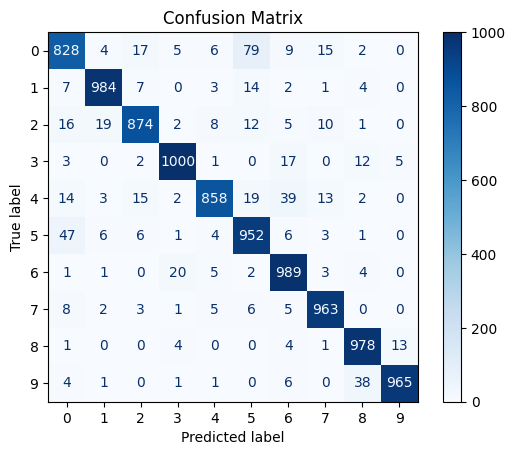

In [22]:
from sklearn.metrics import (confusion_matrix, precision_score, recall_score, 
                             f1_score, accuracy_score, ConfusionMatrixDisplay)

val_predictions = model.predict(X_val)
val_pred_labels = np.argmax(val_predictions, axis=1)
accuracy = accuracy_score(y_val, val_pred_labels)
precision = precision_score(y_val,val_pred_labels, average='weighted')
recall = recall_score(y_val,val_pred_labels, average='weighted')
f1 = f1_score(y_val,val_pred_labels, average='weighted')
cm = confusion_matrix(y_val,val_pred_labels,)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
